# Chapter 2: Processing data for machine learning

To simplify the code examples in these notebooks, we populate the namespace with functions from numpy and matplotlib:

In [1]:
#%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Converting categorical data to numerical features

In [2]:
cat_data = array(['male', 'female', 'male', 'male', 'female', 'male', 'female', 'female'])

In [3]:
def cat_to_num(data):
    categories = unique(data)
    features = []
    for cat in categories:
        binary = (data == cat)
        features.append(binary.astype("int"))
    return features

In [4]:
cat_to_num(cat_data)

[array([0, 1, 0, 0, 1, 0, 1, 1]), array([1, 0, 1, 1, 0, 1, 0, 0])]

### Simple feature engineering of the Titanic dataset

In [5]:
cabin_data = array(["C65", "", "E36", "C54", "B57 B59 B63 B66"])

In [6]:
def cabin_features(data):
    features = []
    for cabin in data:
        cabins = cabin.split(" ")
        n_cabins = len(cabins)
        # First char is the cabin_char
        try:
            cabin_char = cabins[0][0]
        except IndexError:
            cabin_char = "X"
            n_cabins = 0
        # The rest is the cabin number
        try:
            cabin_num = int(cabins[0][1:]) 
        except:
            cabin_num = -1
        # Add 3 features for each passanger
        features.append( [cabin_char, cabin_num, n_cabins] )
    return features

In [7]:
cabin_features(cabin_data)

[['C', 65, 1], ['X', -1, 0], ['E', 36, 1], ['C', 54, 1], ['B', 57, 4]]

### Feature normalization

In [8]:
num_data = array([1, 10, 0.5, 43, 0.12, 8])

In [9]:
def normalize_feature(data, f_min=-1, f_max=1):
    d_min, d_max = min(data), max(data)
    factor = (f_max - f_min) / (d_max - d_min)
    normalized = f_min + data*factor
    return normalized, factor

In [10]:
normalize_feature(num_data)

(array([-0.95335821, -0.53358209, -0.9766791 ,  1.00559701, -0.99440299,
        -0.62686567]), 0.046641791044776115)

In [53]:
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd

# Read titanic data
titanic_dataset = pd.read_csv("data/titanic.csv")

survival_by_sex = pd.crosstab(titanic_dataset['Survived'], titanic_dataset['Sex'])
survival_by_sex

Sex,female,male
Survived,,
0,81,468
1,233,109


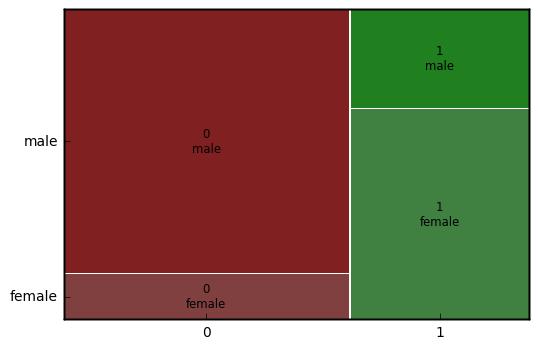

In [57]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
mosaic(survival_by_sex.stack())

plt.show()

